In [14]:
%matplotlib inline
import numpy as np, scipy as sp, matplotlib.pyplot as plt

### 1. Classical vs Quantum Bits

1.1 Statevectors
In quantum computers, our basic variable is the qubit: a quantum variant of the bit. These have exactly the same restrictions as normal bits do: they can store only a single binary piece of information, and can only ever give us an output of 0 or 1. However, they can also be manipulated in ways that can only be described by quantum mechanics. This gives us new gates to play with, allowing us to find new ways to design algorithms.

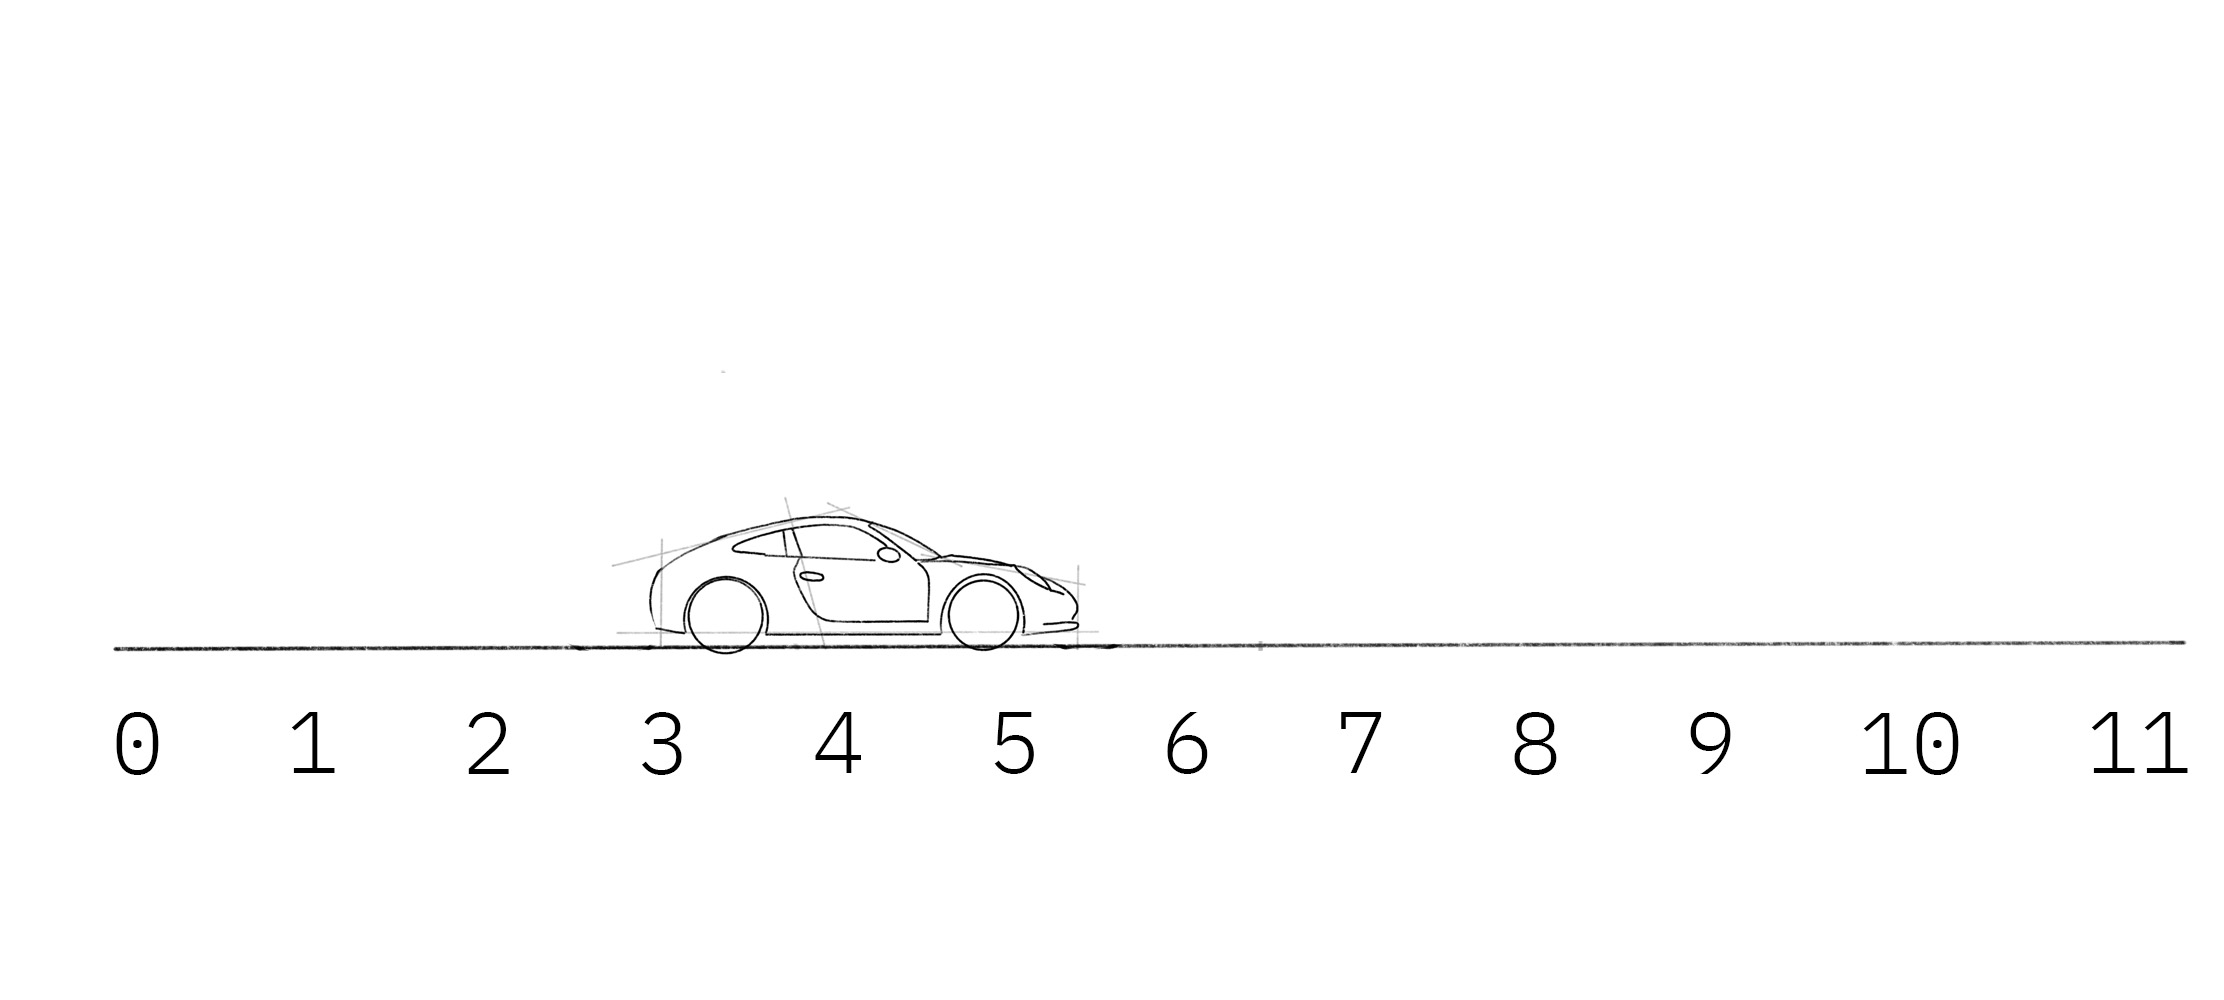

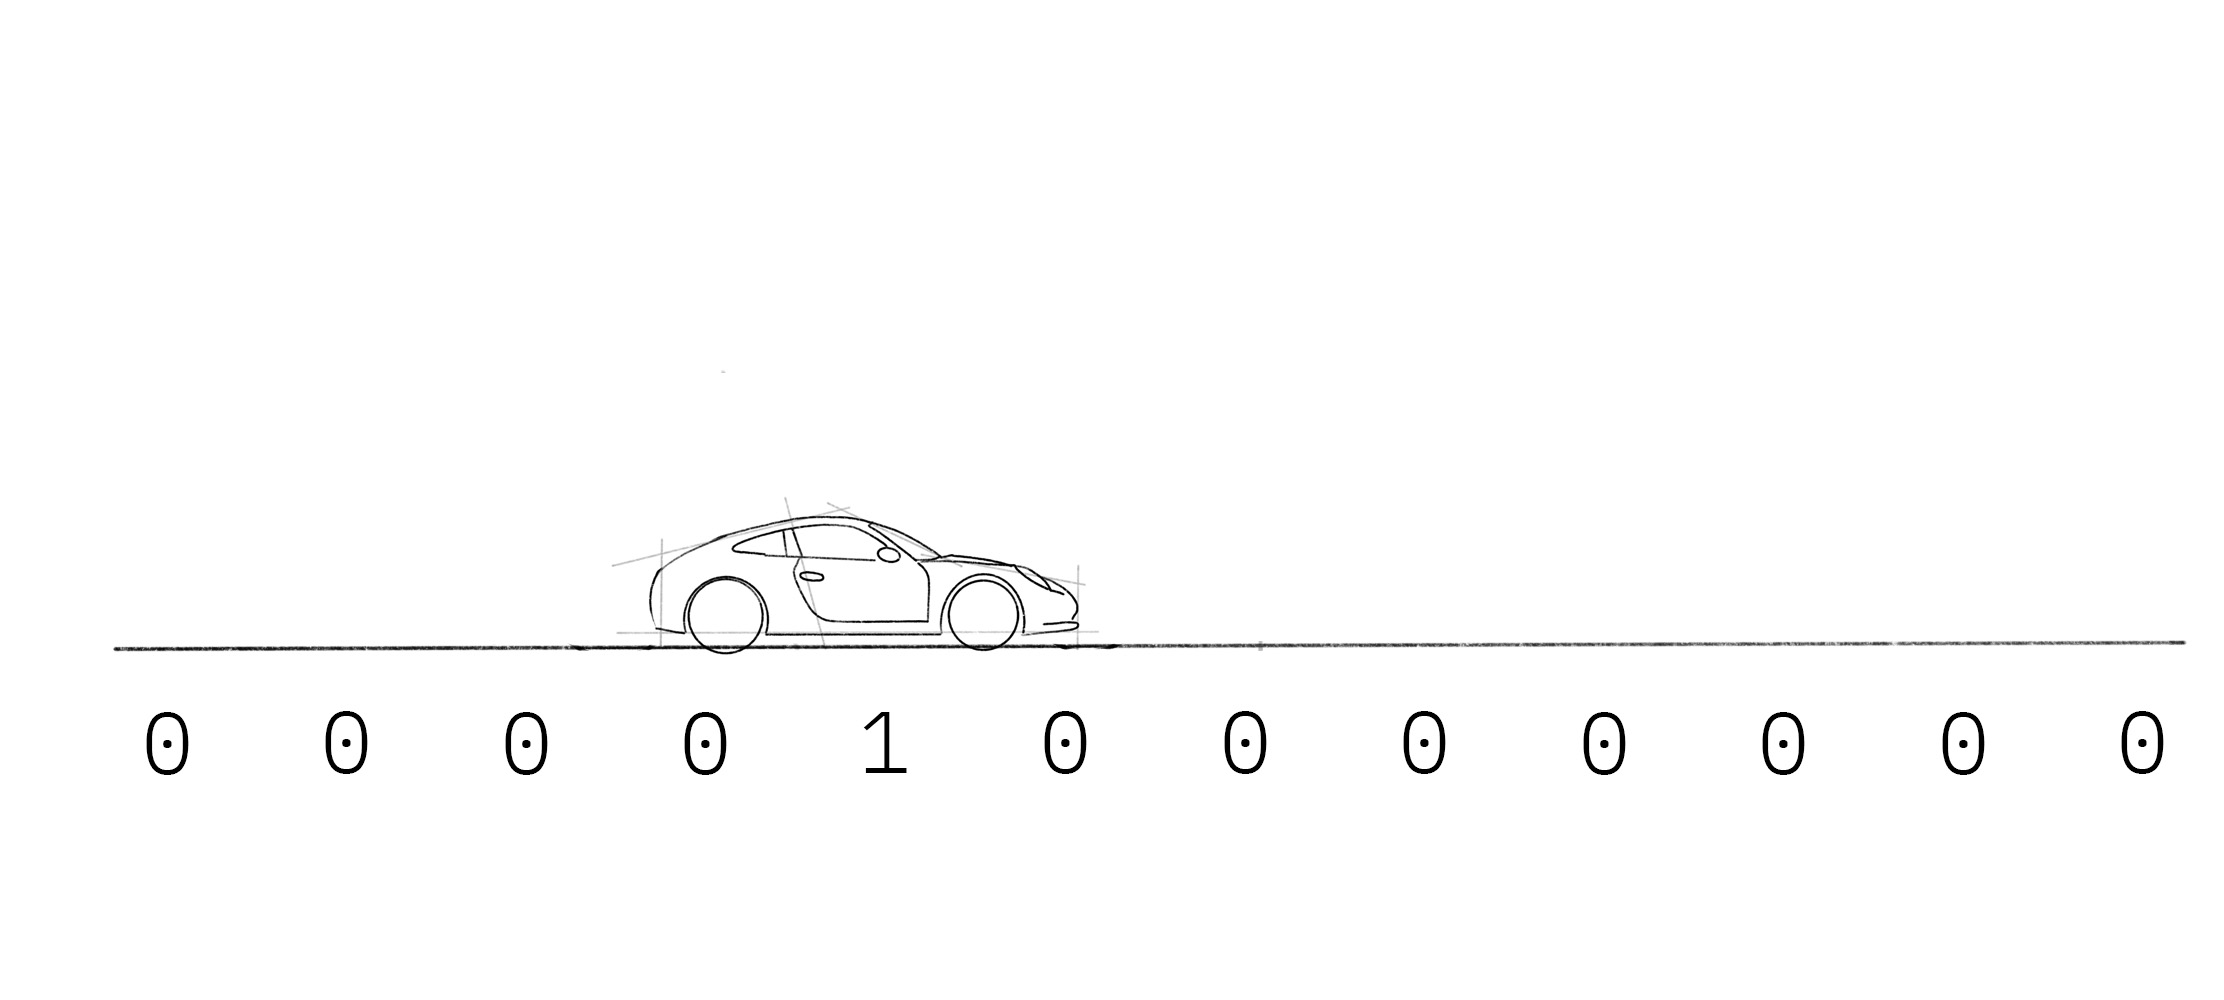

In [17]:
# come back an insert image of state vector or program it in

This isn’t limited to position, we could also keep a statevector of all the possible speeds the car could have, and all the possible colours the car could be. 

### 1.2 Qubit Notation 

Whether we get a 0 or a 1 from a qubit only needs to be well-defined when a measurement is made to extract an output. At that point, it must commit to one of these two options. At all other times, its state will be something more complex than can be captured by a simple binary value.

To see how to describe these, we can first focus on the two simplest cases. As we saw in the last section, it is possible to prepare a qubit in a state for which it definitely gives the outcome 0 when measured.

We need a name for this state. Let's be unimaginative and call it  
0
  . Similarly, there exists a qubit state that is certain to output a 1. We'll call this  
1
 . These two states are completely mutually exclusive. Either the qubit definitely outputs a 0, or it definitely outputs a 1. There is no overlap. One way to represent this with mathematics is to use two orthogonal vectors.

In [19]:
#come back and input mathematical notation of bra-ket

First, let's unpack the weird  
| and ⟩. Their job is essentially just to remind us that we are talking about the vectors that represent qubit states labelled  
0 and 1. This helps us distinguish them from things like the bit values 0 and 1 or the numbers 0 and 1. It is part of the bra-ket notation, introduced by Dirac. 

In [20]:
#input notation of braket

To understand what this state means, we'll need to use the mathematical rules for manipulating vectors. Specifically, we'll need to understand how to add vectors together and how to multiply them by scalars.

This vector, |q0⟩ is called the qubit's statevector, it tells us everything we could possibly know about this qubit. Instead, it is described by a linear combination of the two. In quantum mechanics, we typically describe linear combinations such as this using the word 'superposition'.

Though our example state  
|q0⟩ can be expressed as a superposition of |0⟩ and |1⟩, it is no less a definite and well-defined qubit state than they are. 

### 1.3 Exploring Qubits with Qiskit


In [22]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In Qiskit, we use the QuantumCircuit object to store our circuits, this is essentially a list of the quantum operations on our circuit and the qubits they are applied to.

In [23]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit

In our quantum circuits, our qubits always start out in the state  
|0⟩. We can use the initialize() method to transform this into any state. We give initialize() the vector we want in the form of a list, and tell it which qubit(s) we want to initialize in this state:

In [24]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()  # Let's view our circuit

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

In [25]:
#fix initialization

In [28]:
svsim = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit

In [26]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0,1) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas: 1/═══════════════════════╩═
                               0

This time, instead of the statevector we will get the counts for the 0 and 1 results using .get_counts():

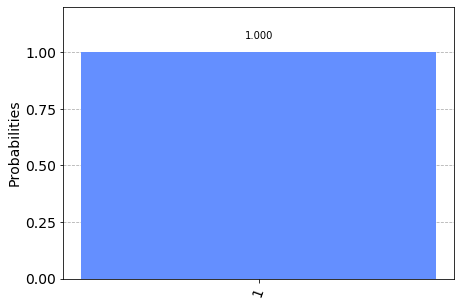

In [29]:
qobj = assemble(qc)
result = svsim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

This time, let’s instead put our qubit into a superposition and see what happens.

We need to add these amplitudes to a python list. To add a complex amplitude, Python uses j for the imaginary unit (we normally call it "i" mathematically):

[0.70710678+0.j         0.        +0.70710678j]


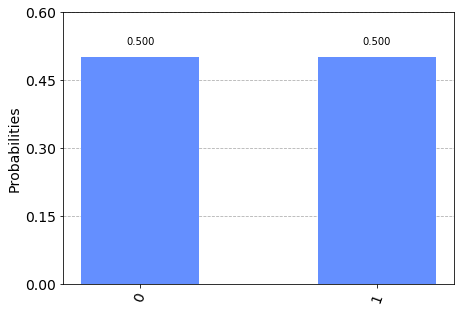

In [30]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector() # Execute the circuit
print(state)           # Print the result
qobj = assemble(qc)
results = svsim.run(qobj).result().get_counts()
plot_histogram(results)

We can see we have equal probability of measuring either  
|0⟩ or |1⟩. To explain this, we need to talk about measurement.

### The Rules of Measurement
2.1 A Very Important Rule

To find the probability of measure state |ψ⟩ in the state |x⟩ we do:

p(|x⟩) = |x|ψ⟩|^2

The symbols ⟨ and | tell us ⟨x| is a row vector. In quantum mechanics we call the column vectors kets and the row vectors bras. Together they make up bra-ket notation. Any ket |a⟩ has a corresponding bra ⟨a|, and we convert between them using the conjugate transpose.

2.2 The Implications of this Rule

\#1 Normalisation

The rule shows us that amplitudes are related to probabilities. If we want the probabilities to add up to 1 (which they should!), we need to ensure that the statevector is properly normalized. Specifically, we need the magnitude of the state vector to be 1.

⟨ψ|ψ⟩ = 1

√(|α|2+|β|2) = 1

This explains the factors of √2 you have seen throughout this chapter. In fact, if we try to give initialize() a vector that isn’t normalised, it will give us an error:

In [31]:
vector = [1,1]
qc.initialize(vector, 0)

QiskitError: 'Sum of amplitudes-squared does not equal one.'

\#2 Alternative Measurement

Nowhere does the rule tell us that |x⟩ can only be either |0⟩ or |1⟩.
For any orthogonal pair of states, we can define a measurement that would cause a qubit to choose between the two.


\#3 Global Phase

        |⟨x|(i|1⟩)|^2= |i⟨x|1⟩|^2 = |⟨x|1⟩|^2

Here we find that the factor of  
i
  disappears once we take the magnitude of the complex number. This effect is completely independent of the measured state |x⟩. It does not matter what measurement we are considering, the probabilities for the state i|1⟩ are identical to those for |1⟩. Since measurements are the only way we can extract any information from a qubit, this implies that these two states are equivalent in all ways that are physically relevant.

More generally, we refer to any overall factor γ on a state for which |γ|= 1  as a 'global phase'. States that differ only by a global phase are physically indistinguishable. 

            |⟨x|(γ|a⟩)|^2 = |γ⟨x|a⟩|^2=|⟨x|a⟩|^2 

Note that this is distinct from the phase difference between terms in a superposition, which is known as the 'relative phase'. This becomes relevant once we consider different types of measurement and multiple qubits.

\#4 The Observer Effect

We know that the amplitudes contain information about the probability of us finding the qubit in a specific state, but once we have measured the qubit, we know with certainty what the state of the qubit is. We sometimes refer to this as collapsing the state of the qubit. It is a potent effect, and so one that must be used wisely. For example, were we to constantly measure each of our qubits to keep track of their value at each point in a computation, they would always simply be in a well-defined state of either |0⟩ or |1⟩.  Measurements are therefore only used when we need to extract an output. This means that we often place all the measurements at the end of our quantum circuit.

We can demonstrate this using Qiskit’s statevector simulator. Let's initialize a qubit in superposition:

In [33]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw()

┌──────────────────────────────┐
q_0: ┤ initialize(0.70711j,0.70711) ├
     └──────────────────────────────┘

In [34]:
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
print("Qubit State = " + str(state))

Qubit State = [0.        +0.70710678j 0.70710678+0.j        ]


In [35]:
qc.measure_all()
qc.draw()

┌──────────────────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0.70711j,0.70711) ├─░─┤M├
        └──────────────────────────────┘ ░ └╥┘
meas: 1/════════════════════════════════════╩═
                                            0